The average fitness score for this generation is 101.5 out of 200.0
The most fit chromsome of 0 th generation is [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The average fitness score for this generation is 119.3 out of 200.0
The most fit chromsome of 1 th generation is [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The average fitness score for this generation is 135.4 out of 200.0
The most fit chromsome of 2 th generation is [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
The average fitness score for this generation is 151.2 out of 200.0
The most fit chromsome of 3 th generation is [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The average fitness score for this generation is 165.1 out of 200.0
The most fit chromsome of 4 th generation is [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The average fitness score for this generation is 176.3 out of 200.0
The most fit chromsome of 5 th generation is [1, 1, 1, 1, 1, 1

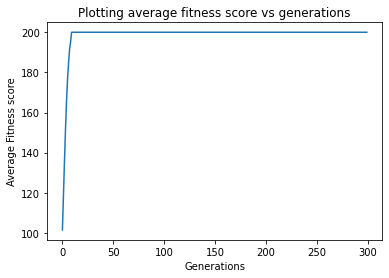

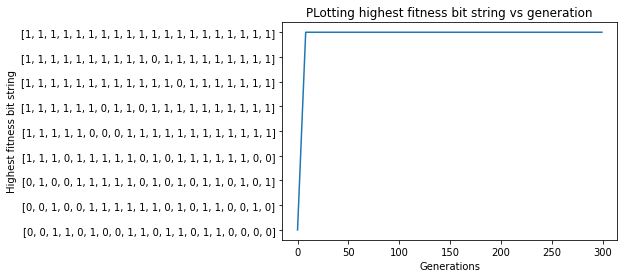

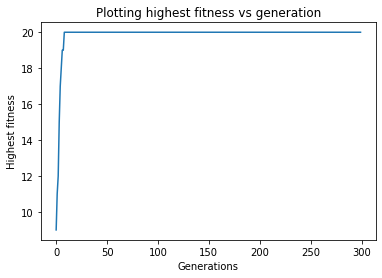

In [58]:
###############################################################################################################################################
#                                                                                                                                             #
#                                                         Logic and procedure                                                                 #
#                                                                                                                                             #
#       1. By using the cal_fitness_score function, we find the best population_size/2 bit strings from population_size bit strings           #
#       2. We use the procedure for one-point crossover and uniform crossover to get the 4 children we need from each pair of parents.        #
#       3. We append the children and update them during each generation for n_iterations times                                               #
#       4. We store the best fitness scores and average fitness scores to help us plot in the end                                             #
#                                                                                                                                             #
#################################################3##############################################################################################



###############################################################################################################################################
#                                                                                                                                             #
#                                                           Functions used                                                                    #
#                                                                                                                                             #
#       1. cal_fitness_score(string) = This takes a string as input and returns its corresponding fitness score                               #
#       2. generate_chromosome() = This returns a randomly generated 20 bit string                                                            #
#       3. crossover(string1,string2) = This takes 2 strings to be mated as inputs and perform uniform as well as one point crossover         #
#         between them thus returning 4 child chromosomes                                                                                     #
#       4. mutate_chromosome(string) = This takes a string as input and returns another string after mutating the input with the given bit    #
#          mutation rate                                                                                                                      #
#                                                                                                                                             #
###############################################################################################################################################



###############################################################################################################################################
#                                                                                                                                             #
#                                                           Variables used                                                                    #
#                                                                                                                                             #
#       1. bit_length = length of the bits                                                                                                    #
#       2. population_size = size of each population                                                                                          #
#       3. mutation_rate = mutation_rate for the bits                                                                                         #
#       4. n_iterations = number of generations                                                                                               #
#       5. sum = returned fitness score for a string                                                                                          #
#       6. child = used to add the children to the chromosome variable                                                                        #
#       7. p = randomly chosen value for one-point crossover                                                                                  #
#       8. mask = randomly generated code for uniform crossover                                                                               #
#       9. child_temp = used to append the 4 values into child                                                                                #
#       10. temp_list = used for data manipulation in mutation                                                                                #
#       11. string = returned mutated variable                                                                                                #
#       12. best_fit = best bit string in the popultion. It contains values for all the generations                                           #
#       13. fitness_score_average = average score for the bits in a population. It contains values for all the generations                    #
#       14. highest_fitness_score = the highest fitness score in a population. It contains values for all the generations                     #
#       15. chromosome = the variable that stores the final chromosome values after each generation                                           #
#       16. fitness_score = the fitness score for all the population bits in a particular generation                                          #
#       17. new_chromosome, chromosome1, child1 = To help in the manipulation to get the final variable 'chromosome'                          #
#                                                                                                                                             #
###############################################################################################################################################



# Importing all the necessary libraries 
import numpy as np
from random import randint
import random
import matplotlib.pyplot as plt
%matplotlib inline


# Initializing all the values 
bit_length = 20
population_size = 200
mutation_rate = 0.01
n_iterations = 300




# Function to calculate the fitness score of a particular string 
# Fitness score is essecntially the sum of 1's in the bit string
def cal_fitness_score(A) : 
  sum = 0

  for i in range (len(A)):
    if (A[i] == '1'):
      sum = sum + 1

  return sum





# Function to randomly generate a bit string of length bit_length
def generate_chromosome():
  B = []

  for i in range(bit_length) :
    B.append(randint(0, 1))

  return str(B)




# This takes 2 strings to be mated as inputs and perform uniform as well as one point crossover between them thus returning 4 child chromosomes
def crossover(string1,string2) : 
  child = []

  # One point crossover 

  # We randomly take a value between (1, bit_length -1), since for one point crossover there is only one change in the value in the mask
  p = randint(1, 19)

  # We now get the child 1 and child 2 using one point crossover. 
  # We use the general logic/procedure to find child 1 and child 2 and add them to our variable
  child.append(string1[0:p] + string2[p:]) 
  child.append(string2[0:p] + string1[p:])
  

  # uniform crossover 

  # We generate a random mask for uniform crossover using the generate_chromosome() function
  mask = generate_chromosome()
  
  # first child of the uniform crossover
  child_temp = ''

  # Note that, the length of the string has been tripled due to the presence of '' and ','. That is why I have to take this kind of for loop
  for m in range(1, 3 * bit_length, 3) : 
    if (mask[m] == '1') : 
      # we add the strings according to the value in the mask and then get the two children
      # Im using the following string concantenation to continue the same format. Else, I will get a string of bit_length characters, and the children
      # from one point crossover will have 3 * bit_length characters.  
      child_temp = child_temp + string1[m-1] + string1[m] + string1[m+1]
      
    else :
      child_temp = child_temp + string2[m-1] + string2[m] + string2[m+1]

  # We add these children onto our variable  
  child.append(child_temp)

  
  # Second child of the crossover
  child_temp = ''

  # Same logic as before, except the strings are opposite
  for h in range(1, 3 * bit_length, 3) : 
    if (mask[h] == '0') : 
      child_temp = child_temp + string1[h-1] + string1[h] + string1[h+1]
      
    else :
      child_temp = child_temp + string2[h-1] + string2[h] + string2[h+1]
      
  child.append(child_temp)

  # We return this variable which has the 4 childen we got from the pair of parents
  return child



# This takes a string as input and returns another string after mutating the input with the given bit mutation rate
def mutate_chromosome(string) : 

  # We convert this string to a list to make it easily mutable 
  temp_list = list(string)
  
  # We traverse the entire string
  for i in range(1, 3 * bit_length, 3) :

    # We generate a number between 0 and 1, and compare it with the mutation_rate to see if we should mutate the particular value in the string
    if (random.uniform(0, 1) < mutation_rate) : 
      
      # Flipping 1 to 0
      if (temp_list[i] == '1') :
        temp_list[i] = "0"

      # Flipping 0 to 1 
      else : 
        temp_list[i] = "1"

  # Since we have to return a string, we convert it from a list to a string
  string = str(temp_list)

  # Returning the mutated string 
  return string




# main part 

best_fit = []
fitness_score_average = []
highest_fitness_score = []

# Initial randomization
# We use generate_chromosome to get the random bit strings population_size times
chromosome = []
for i in range(population_size) : 
  chromosome.append(generate_chromosome())

# Running the code n_iteration times
for i in range(n_iterations) :
  
  # Finding the fitness scores for all these chromosome values
  fitness_score = []

  # We find the fitness scores for all the population_size bits and store it in a variable
  for p in range(population_size) :
    fitness_score.append(cal_fitness_score(chromosome[p]))
    
  fitness_score_average.append((np.sum(fitness_score))/bit_length)
  print("The average fitness score for this generation is",fitness_score_average[i],"out of",float(population_size))
    
  # We convert the list to an array for manipulation
  fitness_score_array = np.array(fitness_score)

  # We now find the arguments correponding to the maximum fitness score 
  arguments = np.argsort(fitness_score_array)[-int(population_size/2):] 

  # We convert the list 'chromosome' to an array and store it in chromosome_array for manipulation
  chromosome_array = np.array(chromosome)

  new_chromosome = []

  # We find the chromosome values correpsonding to the best fitness scores which we had calculated earlier 
  new_chromosome = chromosome_array[arguments]

  # We convert it back to a list
  new_chromosome = new_chromosome.tolist()
 
  # We now update the chromosomes using the functions 
  chromosome1 = []
  child1 = []

  # We traverse the popution_size/2 of bit strings we have now in pairs
  for j in range(0, int(population_size/2), 2) : 
    
    # We assign the child bit strings we get from the crossover into the variable 'child1'
    # Note that we have to convert the list to a string before passing it to the functions
    child1 = (crossover(str(new_chromosome[j]),str(new_chromosome[j+1])))
    
    # Since 'child1' will have 4 values, we append them one by one 
    for l in range(4) : 
      chromosome1.append(child1[l]) 

  # Final finalisation. IN the next iteration, this variable 'chromosome' will further be optimised
  chromosome = chromosome1

  # We now print the most fit chromosome of this generation
  # We follow the same logic as above when we chose the best population_size/2 before
  fitness_score = []
  for s in range(population_size) :
    fitness_score.append(cal_fitness_score(chromosome[s]))

  fitness_score_array = np.array(fitness_score)

  # We choose the best fit chromosome
  arguments = np.argsort(fitness_score_array)[-1:] 

  chromosome_array = np.array(chromosome)
  new_chromosome = []

  new_chromosome = chromosome_array[arguments]
  best_fit.append(chromosome[0])

  highest_fitness_score.append(cal_fitness_score(str(chromosome[0])))
  print("The most fit chromsome of",i,"th generation is", new_chromosome[0])


print("The final chromsome after",n_iterations, "is", chromosome)

  

# plotting average fitness score vs generation
plt.plot(fitness_score_average)
plt.ylabel('Average Fitness score')
plt.xlabel("Generations")
plt.title('Plotting average fitness score vs generations')
plt.show()


# plotting highest fitness bit string vs generation
plt.plot(best_fit)
plt.ylabel('Highest fitness bit string')
plt.xlabel("Generations")
plt.title('PLotting highest fitness bit string vs generation')
plt.show()



# plotting highest fitness vs generation
plt.plot(highest_fitness_score)
plt.ylabel('Highest fitness')
plt.xlabel("Generations")
plt.title('Plotting highest fitness vs generation')
plt.show()





